In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_data = np.arange(0, np.pi*2, 0.1)
correct_data = np.sin(input_data)
input_data = (input_data-np.pi)/np.pi
n_data=len(correct_data)

In [3]:
n_in = 1
n_mid = 3
n_out = 1

In [4]:
wb_width = 0.01  #가중치, 편향 설정을 위한 정규분포의 표준편차
eta=0.1  # 학습률
epoch = 2001
interval = 200 #  경과 표시 간격

In [5]:
#은닉층
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u))  # 시그모이드
        
    def backward(self, grad_y):
        delta = grad_y * (1-self.y) * self.y  # 시그모이드 함수 미분
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [6]:
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u  # 항등함수
        
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta*self.grad_w
        self.b -= eta * self.grad_b

In [7]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

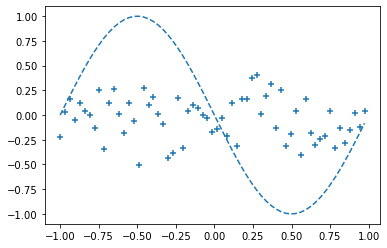

Epoch:0/2001 Error:0.2682990571407426


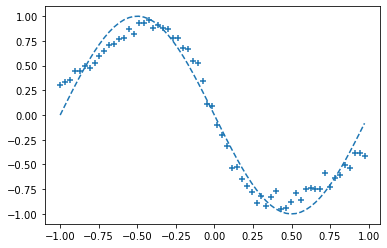

Epoch:200/2001 Error:0.008510614946922564


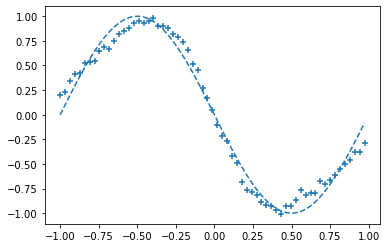

Epoch:400/2001 Error:0.005037127122433959


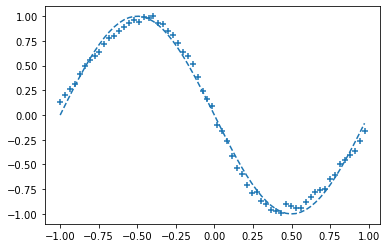

Epoch:600/2001 Error:0.0019179722494857938


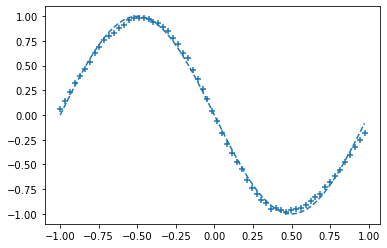

Epoch:800/2001 Error:0.0006696314611586663


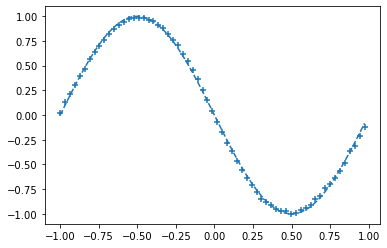

Epoch:1000/2001 Error:0.00018930551411169616


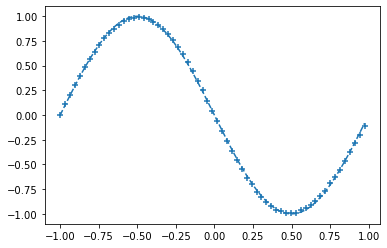

Epoch:1200/2001 Error:7.356165175717102e-05


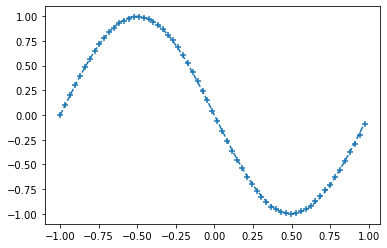

Epoch:1400/2001 Error:3.041761121773621e-05


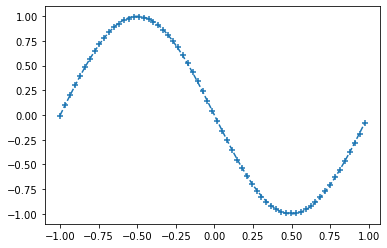

Epoch:1600/2001 Error:1.5237224587060819e-05


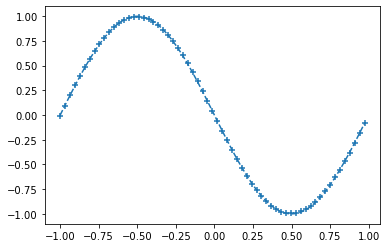

Epoch:1800/2001 Error:1.059553023179882e-05


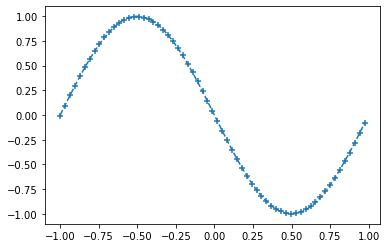

Epoch:2000/2001 Error:9.84376595011299e-06


In [10]:
for i in range(epoch):
    
    index_random = np.arange(n_data) #인덱스 섞기
    np.random.shuffle(index_random)
    
    #결과
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        
        x = input_data[idx:idx+1]  #입력
        t = correct_data[idx:idx+1]# 정답
        
        #순전파
        middle_layer.forward(x.reshape(1,1))  # 입력을 행렬로 변환
        output_layer.forward(middle_layer.y)
        
        #역전파
        output_layer.backward(t.reshape(1,1))  #정답을 행렬로 변환
        middle_layer.backward(output_layer.grad_x)
        
        # 가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            y = output_layer.y.reshape(-1)  #행렬을 벡터로 되돌림
            
            # 오차제곱합 계산
            total_error += 1.0/2.0*np.sum(np.square(y-t))
            
            #출력기록
            plot_x.append(x)
            plot_y.append(y)
        
    if i % interval == 0:
        
        #출력 그래프 표시
        plt.plot( input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        # 에포크, 오차 표시
        print("Epoch:" + str(i) + "/" + str(epoch),
             "Error:" + str(total_error/n_data))

In [11]:
n_data

63

In [12]:
input_data

array([-1.        , -0.96816901, -0.93633802, -0.90450703, -0.87267605,
       -0.84084506, -0.80901407, -0.77718308, -0.74535209, -0.7135211 ,
       -0.68169011, -0.64985913, -0.61802814, -0.58619715, -0.55436616,
       -0.52253517, -0.49070418, -0.45887319, -0.4270422 , -0.39521122,
       -0.36338023, -0.33154924, -0.29971825, -0.26788726, -0.23605627,
       -0.20422528, -0.1723943 , -0.14056331, -0.10873232, -0.07690133,
       -0.04507034, -0.01323935,  0.01859164,  0.05042262,  0.08225361,
        0.1140846 ,  0.14591559,  0.17774658,  0.20957757,  0.24140856,
        0.27323954,  0.30507053,  0.33690152,  0.36873251,  0.4005635 ,
        0.43239449,  0.46422548,  0.49605647,  0.52788745,  0.55971844,
        0.59154943,  0.62338042,  0.65521141,  0.6870424 ,  0.71887339,
        0.75070437,  0.78253536,  0.81436635,  0.84619734,  0.87802833,
        0.90985932,  0.94169031,  0.97352129])